<a href="https://colab.research.google.com/github/plindma/ST-554-Project1/blob/main/Task2/ST554Project1Task2_Loring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST 554 Project 1: Task 2**
---
Authored by: Jamie Loring

Collaborators: Peter Lindmark, Evan Whitfield

### **Installing & Importing Required Modules**
The code below imports the modules that will be used to read in the data and conduct EDA. This includes the `ucimlrepo` library that needs to be installed before importing the requried dataset.

In [1]:
!pip install ucimlrepo
import ucimlrepo as uci
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Reading in the Dataset and Data Information**
The code below reads in the data from the UCI website. In particular, the *IMPORT IN PYTHON* button was used to write this code. For more information, please visit UCI website linked [here](https://archive.ics.uci.edu/dataset/360/air+quality).

In [2]:
# fetch dataset
air_quality = uci.fetch_ucirepo(id=360)

# save the data we specifically need
X = air_quality.data.features
X.head() #see the first few rows of the dataframe

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


Here is a description of all the variables:

- “True” (or gold standard) measurements of pollutants in the air
    - CO(GT) (CO concentration)
    - NMHC(GT) (Non Metanic HydroCarbon concentration)
    - C6H6(GT) (Benzene concentration)
    - NOx(GT) (NOx concentration)
    - NO2(GT) (NO2 concentration)
- Sensor measurements of pollutants in the air
    - PT08.S1(CO)
    - PT08.S2(NMHC)
    - PT08.S3(NOx)
    - PT08.S4(NO2)
    - PT08.S5(O3)
- Weather related measurements
    - T (temperature)
    - RH (Relative humidity)
    - AH (Absolute humidity)

### **Goals of EDA and Data Cleanup**
Our goal is to investigate relationships between the sensor and weather variables with the Benzene variable. Thus, I will do the following:

- Remove the excesss "True" variables from our dataset
- Do some column renaming to make the dataset more workable
- Remove all rows where any missing values occurred (according to the UCI website, -200 indicates a missing value)
- Recode the Date and Time variables to be numeric dates and times (respectively) instead of strings
- Sort the dataset by Date, then Time
- Store the resulting data in an object called `air_qual_sub`

In [3]:
# drop unnecessary columns and rename kept ones
air_qual_sub = X.drop(columns=["CO(GT)", "NMHC(GT)", "NOx(GT)", "NO2(GT)"]) \
                .rename(columns={"C6H6(GT)": "Benzene",
                                 "PT08.S1(CO)": "CO",
                                 "PT08.S2(NMHC)": "NMHC",
                                 "PT08.S3(NOx)": "NOx",
                                 "PT08.S4(NO2)": "NO2",
                                 "PT08.S5(O3)": "O3",
                                 "T": "Temperature",
                                 "RH": "Rel_Humid",
                                 "AH": "Abs_Humid"})

# numeric columns with default missing value of -200
cols_miss_val = ['CO', 'Benzene', 'NMHC', 'NOx', 'NO2', 'O3', 'Temperature', 'Rel_Humid', 'Abs_Humid']

# convert to actual NaN and remove rows with any NaN values
air_qual_sub[cols_miss_val] = air_qual_sub[cols_miss_val].replace(-200, np.nan)
air_qual_sub = air_qual_sub.dropna()

# recode Date and Time as actual date/time variables (not strings), and sort in nested ascending order
air_qual_sub["Date"] = pd.to_datetime(air_qual_sub["Date"], format="%m/%d/%Y")
air_qual_sub["Time"] = pd.to_datetime(air_qual_sub["Time"], format="%H:%M:%S").dt.time
air_qual_sub = air_qual_sub.sort_values(by=["Date", "Time"])
air_qual_sub

,Date,Time,CO,Benzene,NMHC,NOx,NO2,O3,Temperature,Rel_Humid,Abs_Humid
0,2004-03-10,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


### **Begin EDA**

We will first create a two-way contingency table that shows the average Benzene concentration by Date and Time.

In [4]:
pd.crosstab(
  air_qual_sub.Date,
  air_qual_sub.Time,
  values = air_qual_sub.Benzene,
  aggfunc = ["mean"])

mean                                                        \
Time       00:00:00 01:00:00 02:00:00 03:00:00 04:00:00 05:00:00 06:00:00   
Date                                                                        
2004-03-10      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2004-03-11      3.6      3.3      2.3      1.7      1.3      1.1      1.6   
2004-03-12      5.9      6.4      4.1      1.9      1.1      1.0      1.8   
2004-03-13      9.6      7.4      5.4      5.4      6.2      2.6      2.9   
2004-03-14     11.0     11.9      8.6      9.7      5.2      3.7      2.5   
...             ...      ...      ...      ...      ...      ...      ...   
2005-03-31      4.8      4.1      2.5      1.7      1.6      2.6      6.1   
2005-04-01      1.5      1.0      1.1      0.9      0.8      1.4      2.0   
2005-04-02      5.8      1.9      1.5      1.4      0.9      1.4      2.0   
2005-04-03      2.5      2.8      2.7      2.8      2.0      1.0      1.3   
2005-04-04      3.5      1.9      1.5      1.1      0.8      1.3      4.4   

                                       ...                             \
Time       07:00:00 08:00:00 09:00:00  ... 14:00:00 15:00:00 16:00:00   
Date                                   ...                              
2004-03-10      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2004-03-11      3.2      8.0      9.5  ...     11.5      8.8      8.3   
2004-03-12      4.4     17.9     22.1  ...     12.8     14.2     12.7   
2004-03-13      5.1     11.8     15.1  ...      8.6      9.2     10.2   
2004-03-14      2.4      4.2      6.4  ...      7.5      8.2     11.9   
...             ...      ...      ...  ...      ...      ...      ...   
2005-03-31     23.6     10.9      6.8  ...      3.1      3.7      3.8   
2005-04-01      6.7      6.3      4.3  ...      3.3      3.6      4.3   
2005-04-02      3.1      2.5      2.7  ...      2.3      2.5      2.9   
2005-04-03      1.7      2.4      4.1  ...      4.2      5.4      6.3   
2005-04-04     17.4     22.4     13.6  ...     11.9      NaN      NaN   

                                                                           
Time       17:00:00 18:00:00 19:00:00 20:00:00 21:00:00 22:00:00 23:00:00  
Date                                                                       
2004-03-10      NaN     11.9      9.4      9.0      9.2      6.5      4.7  
2004-03-11     11.2     20.8     27.4     24.0     12.8      4.7      2.6  
2004-03-12     11.7     19.3     18.2     32.6     20.1     14.3     21.8  
2004-03-13     10.6     15.5     19.6     19.2     18.3     13.1     10.9  
2004-03-14     12.0     12.2     20.6     23.1     14.7      9.0      8.8  
...             ...      ...      ...      ...      ...      ...      ...  
2005-03-31      6.5      7.2      8.3      4.4      2.3      1.8      2.1  
2005-04-01      5.1      5.5      7.4      3.7      1.9      2.1      3.4  
2005-04-02      3.5      4.0      3.5      2.9      1.8      1.8      2.1  
2005-04-03      6.1      4.6     11.1      7.9      6.0      5.8      5.1  
2005-04-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[383 rows x 24 columns]

COMMENT ON ABOVE!

The code below generates a correlation matrix for all the numeric variables in the `air_qual_sub` dataset. Correlations with absolute value closest to 1 are strongest, wihle those closest to 0 are the weakest. It's important to note that correlation measures the *linear* relationship between variables, so it is important to investigate the results visually as well.

In [24]:
air_qual_sub[["CO", "Benzene", "NMHC", "NOx", "NO2", "O3", "Temperature", "Rel_Humid", "Abs_Humid"]].corr()

,CO,Benzene,NMHC,NOx,NO2,O3,Temperature,Rel_Humid,Abs_Humid
CO,1.000000,0.883795,0.892964,-0.771938,0.682881,0.899324,0.048627,0.114606,0.135324
Benzene,0.883795,1.000000,0.981950,-0.735744,0.765731,0.865689,0.198956,-0.061681,0.167972
NMHC,0.892964,0.981950,1.000000,-0.796703,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx,-0.771938,-0.735744,-0.796703,1.000000,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2,0.682881,0.765731,0.777254,-0.538468,1.000000,0.591144,0.561270,-0.032188,0.629641
O3,0.899324,0.865689,0.880578,-0.796569,0.591144,1.000000,-0.027172,0.124956,0.070751
Temperature,0.048627,0.198956,0.241373,-0.145112,0.561270,-0.027172,1.000000,-0.578621,0.656397
Rel_Humid,0.114606,-0.061681,-0.090380,-0.056740,-0.032188,0.124956,-0.578621,1.000000,0.167971
Abs_Humid,0.135324,0.167972,0.186933,-0.232017,0.629641,0.070751,0.656397,0.167971,1.000000


#### **Create Scatterplot Function**
The code below creates a function that uses `matplotlib` to generate a scatterplot of the two variables selected by the user from the `air_qual_sub` dataset. Simply pass the x-variable and y-variable of choice into the `scatter_plot` function, and if the inputs are valid, a scatterplot will generate with appropriate axes and an appropriate title. Otherwise, an exception is raised.

In [6]:
# assumes numpy, pandas, and matplotlib are already imported in -- if not, import them!
def scatter_plot(x_var: str, y_var: str):

    """
    This function creates a scatterplot from the air_qual_sub dataset to assist with visually seeing the results
    of the previously generated correlation matrix.

    x_var = a numeric variable from the air_qual_sub dataset that will go on the x-axis
    y_var = a numeric variable from the air_qual_sub dataset that will go on the y-axis

    Returns a scatterplot featuring x_var and y_var.
    """

    if x_var not in ["CO", "Benzene", "NMHC", "NOx", "NO2", "O3", "Temperature", "Rel_Humid", "Abs_Humid"]:
        raise Exception("Invalid input to x_var or y_var. Please try again with numeric variables.")

    if y_var not in ["CO", "Benzene", "NMHC", "NOx", "NO2", "O3", "Temperature", "Rel_Humid", "Abs_Humid"]:
        raise Exception("Invalid input to x_var or y_var. Please try again with numeric variables.")

    plt.scatter(air_qual_sub[x_var], air_qual_sub[y_var])
    plt.title('Scatterplot of ' + y_var + ' vs ' + x_var)
    plt.xlabel(x_var)
    plt.ylabel(y_var)

I am particularly interested in using this function to investigate the variables that strongly correlate with the Benzene variable. Looking at the previously generated correlation matrix, I think it will be interesting to look at scatterplots of Benzene with all the sensor measurements of pollutants in the air. The correlations of Benzene with the weather-related measurements do not seem worth investigating by scatterplot, so I will analyze those via another method later.

*Note: ANY numeric variables from the* `air_quality_sub` *dataset can be used with this function; it is not a requirement that the Benzene variable is one of the arguments.*

##### **Scatterplot 1: Benzene vs. CO**

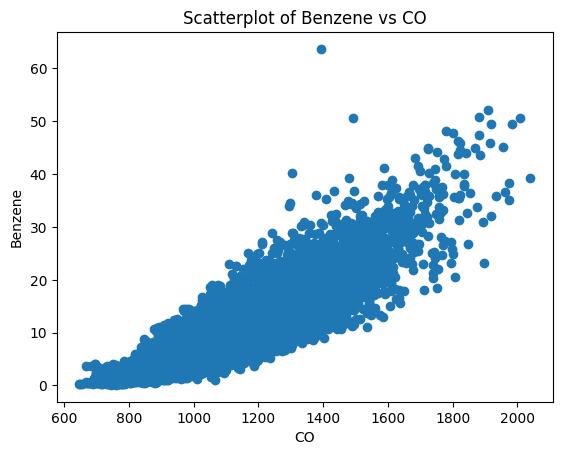

In [7]:
scatter_plot("CO", "Benzene")

I notice a strong relationship in the above scatterplot. However, I think a quadratic line is a better fit to this data than a straight line. I see some slight curvature. I wonder if quadratic relationships will show up between Benzene and some of the other variables!

##### **Scatterplot 2: Benzene vs. NMHC**

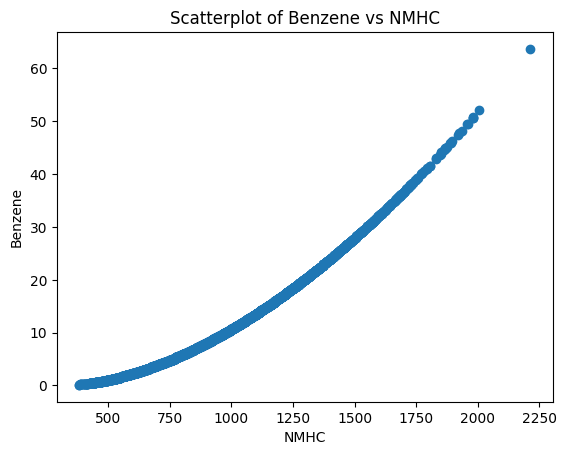

In [8]:
scatter_plot("NMHC", "Benzene")

This is a great example of a non-linear relationship. I'm surprised the correlation of 0.98195 is this high, because the correlations we computed measure linear relationships. However, we can see from the graph that this relationship is definitely not linear!

##### **Scatterplot 3: Benzene vs. NOx**

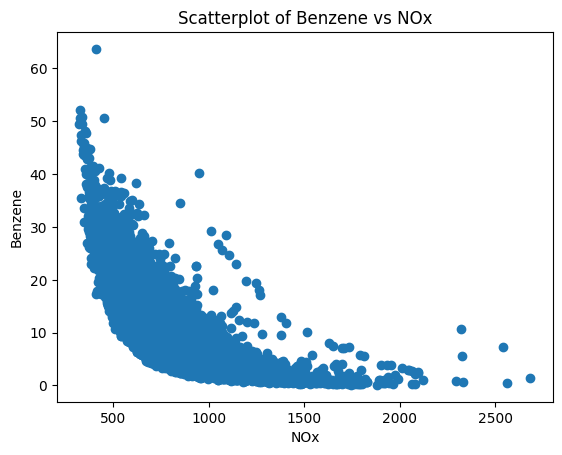

In [9]:
scatter_plot("NOx", "Benzene")

This is an example of a negative non-linear relationship. As NOx values increase, it appears that Benzene levels decrease. A downward curve can easily be pictured in the data.

##### **Scatterplot 4: Benzene vs. NO2**

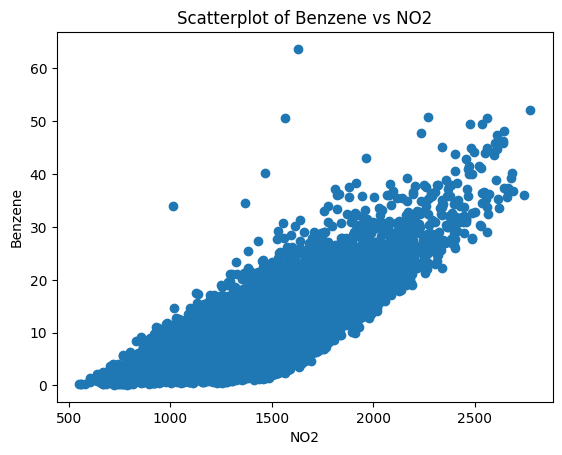

In [10]:
scatter_plot("NO2", "Benzene")

This scatterplot appears very similarly to the first one between Benzene and O2. While a straightline fit could potentially be adequate, I think a curved line fits the data better.

##### **Scatterplot 5: Benzene vs. O3**

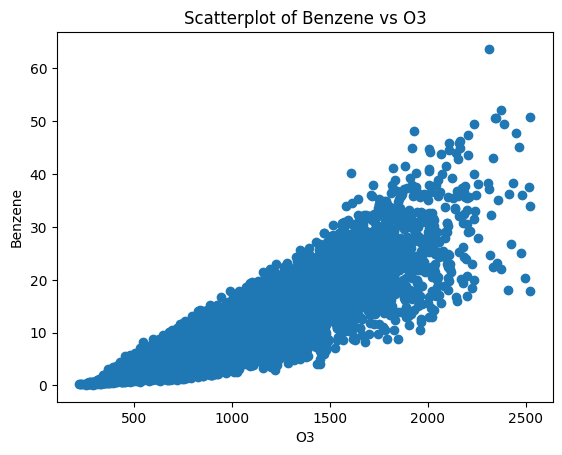

In [11]:
scatter_plot("O3", "Benzene")

Of the five scatterplots generated, I think that this is the best instance of a linear relationship. I'd be curious to see what a curved fit would look like, but we can see a strong positive relationship between these variables.

Since several of the relationships modeled above seemed to be more quadratic or curved than linear, I'm interested in re-computing the correlations with a method that accounts for this. The previous correlation matrix generated Pearson correlations, which strictly measures linear relationships. Spearman correlations, however, can adequately measure any *monotonic* relationship. I will regenerate the correlation matrix using the Spearman method to see how the values adjust (and recopy the Pearson correlation matrix here for convenience).

In [25]:
# Pearson correlations (again)
air_qual_sub[["CO", "Benzene", "NMHC", "NOx", "NO2", "O3", "Temperature", "Rel_Humid", "Abs_Humid"]].corr()

,CO,Benzene,NMHC,NOx,NO2,O3,Temperature,Rel_Humid,Abs_Humid
CO,1.000000,0.883795,0.892964,-0.771938,0.682881,0.899324,0.048627,0.114606,0.135324
Benzene,0.883795,1.000000,0.981950,-0.735744,0.765731,0.865689,0.198956,-0.061681,0.167972
NMHC,0.892964,0.981950,1.000000,-0.796703,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx,-0.771938,-0.735744,-0.796703,1.000000,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2,0.682881,0.765731,0.777254,-0.538468,1.000000,0.591144,0.561270,-0.032188,0.629641
O3,0.899324,0.865689,0.880578,-0.796569,0.591144,1.000000,-0.027172,0.124956,0.070751
Temperature,0.048627,0.198956,0.241373,-0.145112,0.561270,-0.027172,1.000000,-0.578621,0.656397
Rel_Humid,0.114606,-0.061681,-0.090380,-0.056740,-0.032188,0.124956,-0.578621,1.000000,0.167971
Abs_Humid,0.135324,0.167972,0.186933,-0.232017,0.629641,0.070751,0.656397,0.167971,1.000000


In [27]:
# Spearman correlations
air_qual_sub[["CO", "Benzene", "NMHC", "NOx", "NO2", "O3", "Temperature", "Rel_Humid", "Abs_Humid"]].corr(method="spearman")

,CO,Benzene,NMHC,NOx,NO2,O3,Temperature,Rel_Humid,Abs_Humid
CO,1.000000,0.889480,0.889490,-0.854099,0.645769,0.894292,0.081321,0.092392,0.138244
Benzene,0.889480,1.000000,0.999984,-0.850360,0.748551,0.873823,0.275650,-0.122272,0.191749
NMHC,0.889490,0.999984,1.000000,-0.850347,0.748550,0.873836,0.275590,-0.122260,0.191698
NOx,-0.854099,-0.850360,-0.850347,1.000000,-0.536110,-0.862422,-0.118404,-0.083949,-0.217418
NO2,0.645769,0.748551,0.748550,-0.536110,1.000000,0.560932,0.614467,-0.066333,0.645165
O3,0.894292,0.873823,0.873836,-0.862422,0.560932,1.000000,-0.002124,0.128045,0.083345
Temperature,0.081321,0.275650,0.275590,-0.118404,0.614467,-0.002124,1.000000,-0.542615,0.701267
Rel_Humid,0.092392,-0.122272,-0.122260,-0.083949,-0.066333,0.128045,-0.542615,1.000000,0.155700
Abs_Humid,0.138244,0.191749,0.191698,-0.217418,0.645165,0.083345,0.701267,0.155700,1.000000


Text(0, 0.5, 'Benzene')

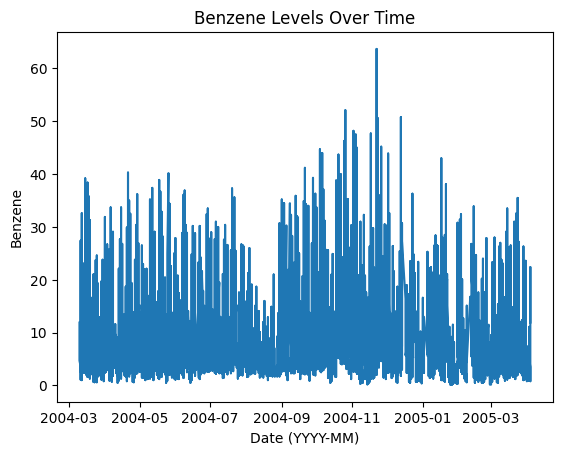

In [21]:
plt.plot(air_qual_sub.Date, air_qual_sub.Benzene)
plt.title("Benzene Levels Over Time")
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Benzene")